https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/#labels

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("../Dataset/h1n1_detection_data.csv")
df2=pd.read_csv("../Dataset/h1n1_detection_label.csv")
df2.drop(columns=["respondent_id"],inplace=True)
test=pd.read_csv("../Dataset/h1n1_detection_test.csv")

In [7]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


<Axes: >

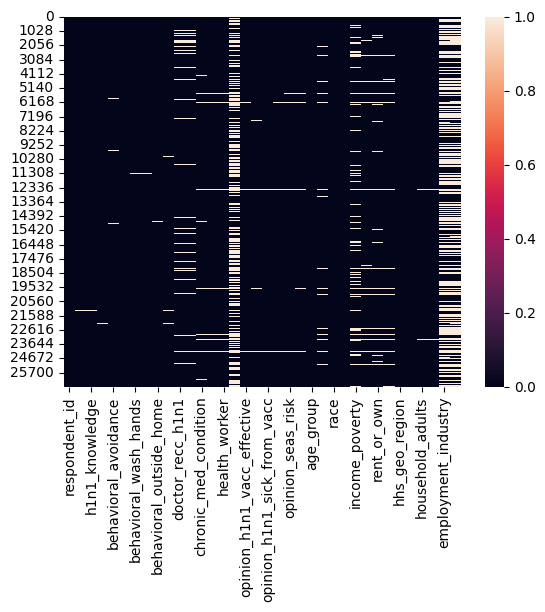

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.columns.tolist()

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation']

In [10]:
if(df['employment_occupation'].isna().sum()>5000):
    print('employment_occupation has more than 500o missing values')

employment_occupation has more than 500o missing values


In [11]:
nan_columns = df.isna().sum()[df.isna().sum() > 5000].index
print(nan_columns)
df.drop(nan_columns, axis=1, inplace=True)
test.drop(nan_columns, axis=1, inplace=True)

Index(['health_insurance', 'employment_industry', 'employment_occupation'], dtype='object')


In [12]:
# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Using mode safely
    test[col] = test[col].fillna(df[col].mode()[0])  # Using mode safely

# Fill numerical columns with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median()) 
    if(col!="h1n1_vaccine" or col!="seasonal_vaccine"):# Median for numerical columns
        test[col] = test[col].fillna(df[col].median())  # Median for numerical columns


<Axes: >

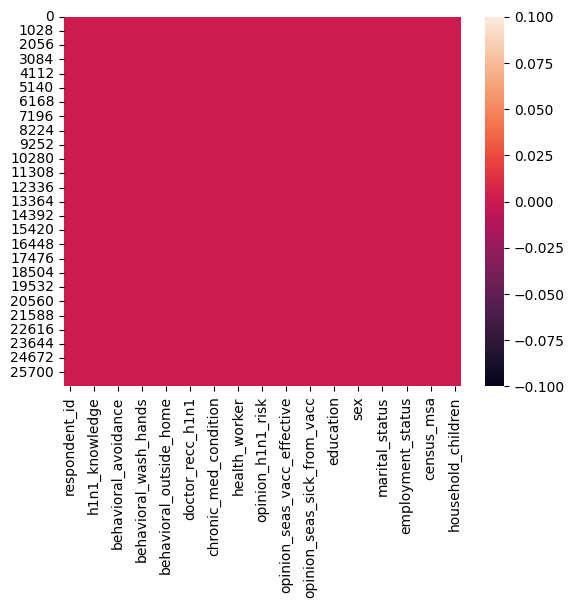

In [13]:
sns.heatmap(df.isna())

In [14]:
df.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [15]:
df.columns.tolist()

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children']

In [16]:
int_columns=df.select_dtypes(include=["int64"]).columns
df[int_columns].head(2)

,respondent_id
0,0
1,1


In [17]:
df = df.astype({col: 'int' for col in df.select_dtypes(include=['float64']).columns})
test = test.astype({col: 'int' for col in df.select_dtypes(include=['float64']).columns})


In [18]:

import warnings

warnings.filterwarnings('ignore')
for i in int_columns.tolist():
    print(i)  # Check the data type of the column

    # plt.figure(figsize=(8, 4))
    # sns.countplot(x=df[i], order=df[i].value_counts().index, palette='viridis')
    # plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    # plt.title(f'Distribution of {i}')
    # plt.xlabel(i)
    # plt.ylabel('Count')
    # plt.show() 

respondent_id


In [19]:
df["age_group"].value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [20]:
catagorical_columns=df.select_dtypes(include=["object"]).columns
df[catagorical_columns].head(2)

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"


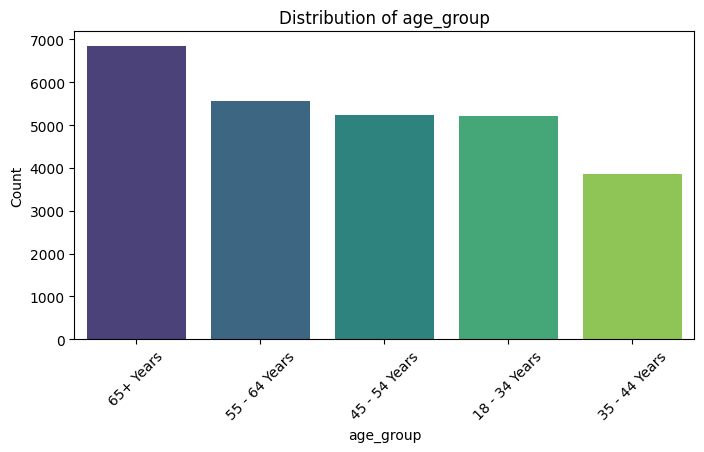

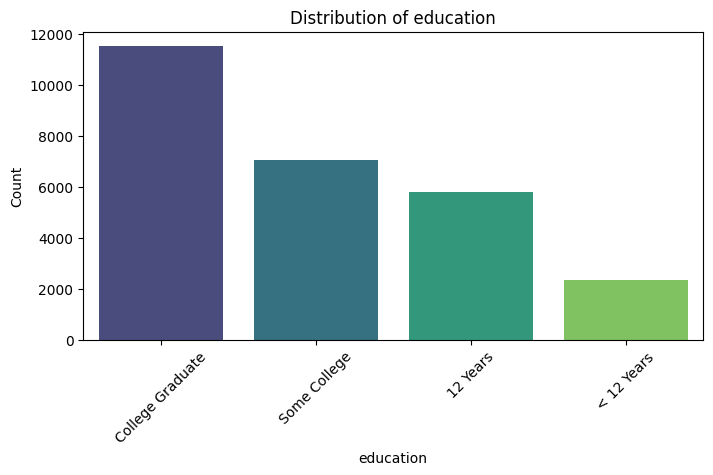

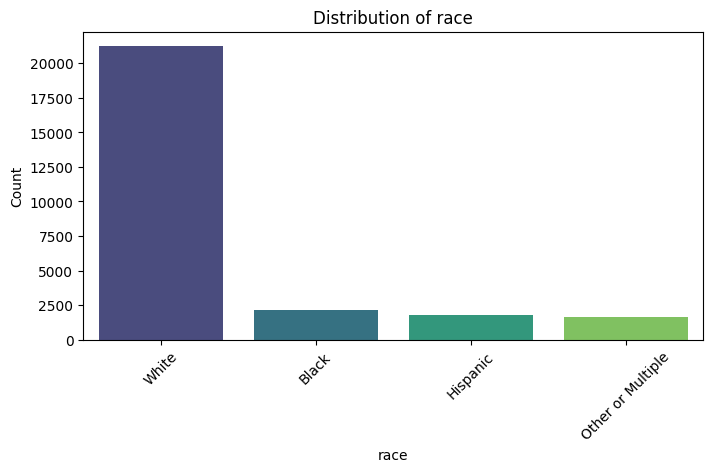

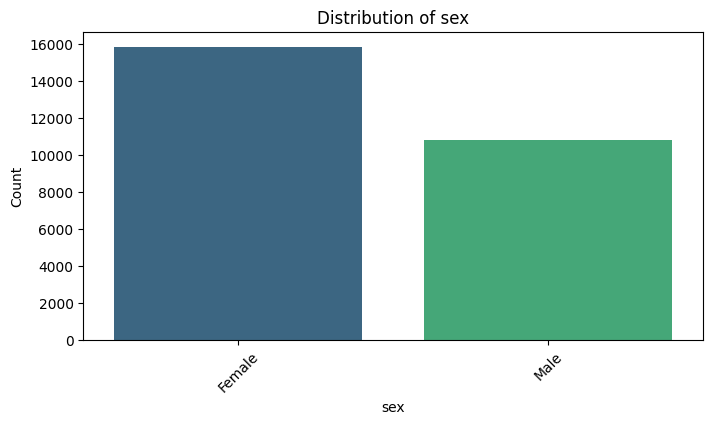

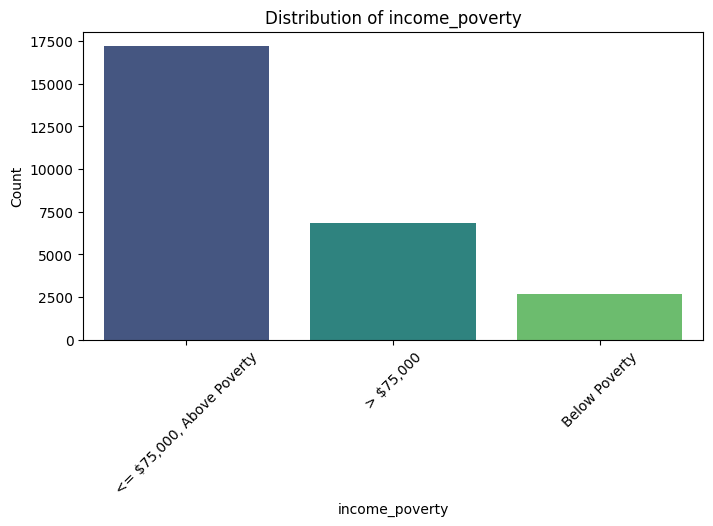

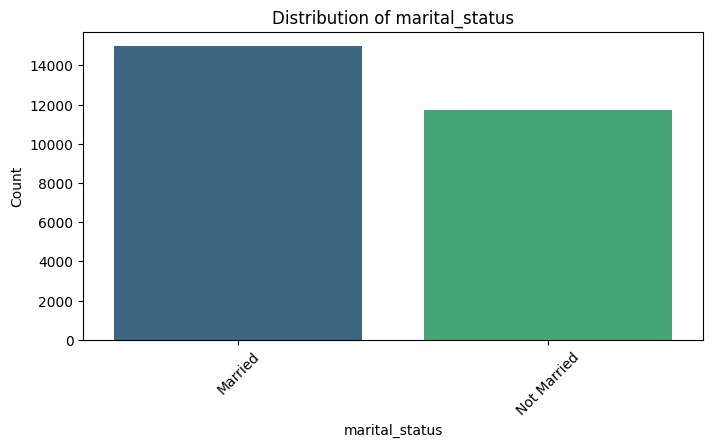

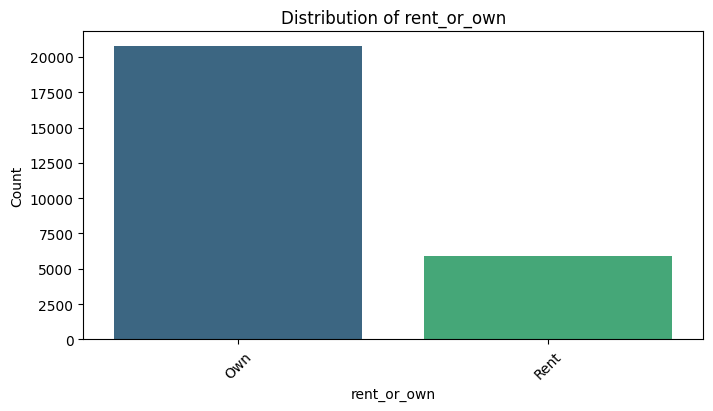

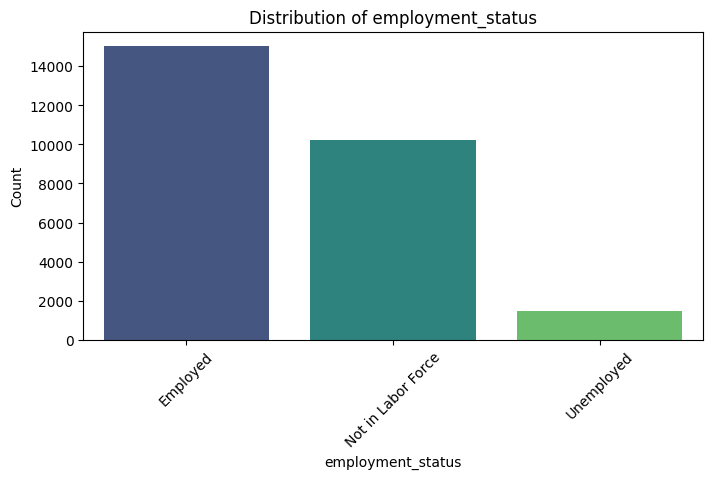

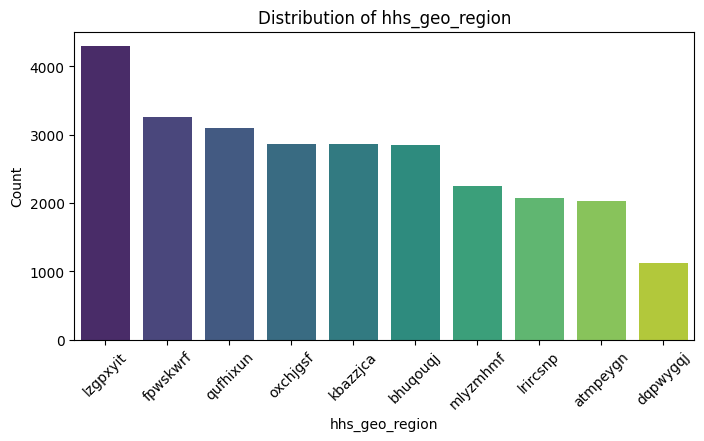

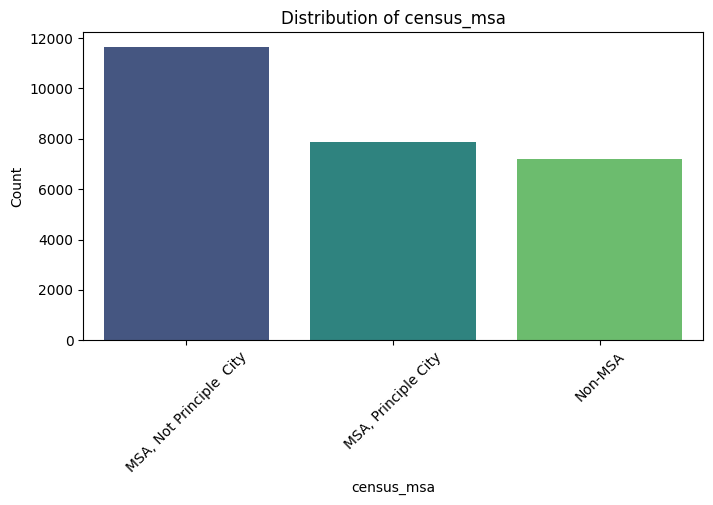

In [21]:

import warnings

warnings.filterwarnings('ignore')
for i in catagorical_columns:
   
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[i], order=df[i].value_counts().index, palette='viridis')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show() 
    

In [22]:
df.dtypes.value_counts()

int32     22
object    10
int64      1
Name: count, dtype: int64

In [23]:
catagorical_columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')

In [24]:
for i in catagorical_columns:
    print(df[i].value_counts())

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64
education
College Graduate    11504
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64
race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64
sex
Female    15858
Male      10849
Name: count, dtype: int64
income_poverty
<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64
marital_status
Married        14963
Not Married    11744
Name: count, dtype: int64
rent_or_own
Own     20778
Rent     5929
Name: count, dtype: int64
employment_status
Employed              15023
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64
hhs_geo_region
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjc

In [25]:
catagorical_columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')

In [26]:
from sklearn.preprocessing import  LabelEncoder

labelencode=LabelEncoder()
for i in catagorical_columns:
    df[i]=labelencode.fit_transform(df[i])
    test[i]=labelencode.fit_transform(test[i])
    
pd.get_dummies(df, drop_first=True)
pd.get_dummies(test, drop_first=True)
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,1,0,0,0,0,0,0,1,1,...,3,0,2,1,0,1,8,2,0,0
1,1,3,2,0,1,0,1,0,1,1,...,3,1,2,1,1,0,1,0,0,0
2,2,1,1,0,1,0,0,0,0,0,...,3,1,0,1,0,0,9,0,2,0
3,3,1,1,0,1,0,1,1,0,0,...,3,0,2,1,1,1,5,1,0,0
4,4,2,1,0,1,0,1,1,0,1,...,3,0,0,0,0,0,9,0,1,0


In [27]:
test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,1,1,1,0,7,0,1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,2,1,1,0,1,2,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,3,1,1,0,0,0,5,2,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,0,0,0,1,5,0,1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,0,6,2,0.0,1.0


<Axes: >

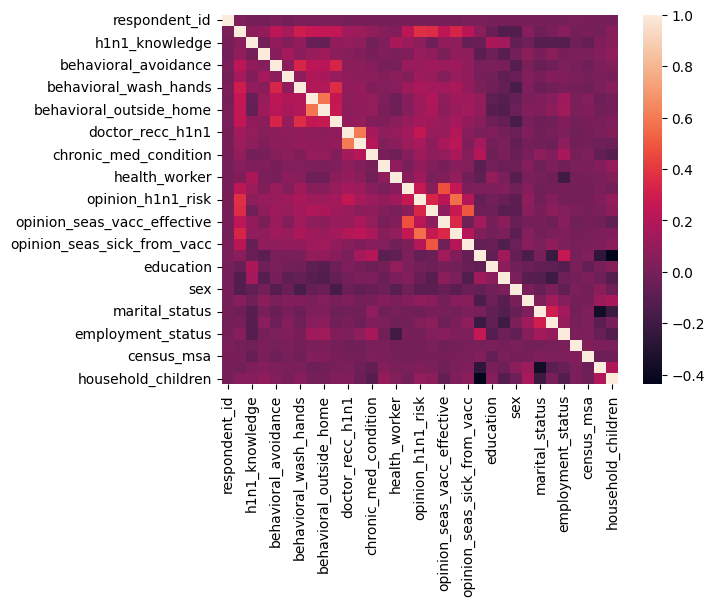

In [28]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix)

In [29]:
x=df
y1=df2["h1n1_vaccine"]
y2=df2["seasonal_vaccine"]


In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split   
from sklearn.metrics import accuracy_score

x_train1,x_test1,y_train1,y_test1=train_test_split(x,y1,test_size=0.2,random_state=42)

In [31]:
model=XGBClassifier()
model.fit(x_train1,y_train1)
y_pred=model.predict(x_test1)
accuracy_score(y_test1,y_pred)

0.8294646199925122

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x, y1)

print(grid_search.best_params_)


KeyboardInterrupt: 

In [ ]:
model1=XGBClassifier()
model1.fit(x,y1)
y_pred1=model1.predict_proba(test)

y_pred1

array([[0.85498464, 0.14501539],
       [0.9759328 , 0.02406723],
       [0.8397483 , 0.16025168],
       ...,
       [0.93814546, 0.06185456],
       [0.9795577 , 0.02044232],
       [0.85228   , 0.14771995]], dtype=float32)

In [ ]:
y_pred_x=model1.predict(test)
y_pred_x

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model2=XGBClassifier()
model2.fit(x,y1)
y_pred2=model2.predict_proba(test)
y_pred2

array([[0.85498464, 0.14501539],
       [0.9759328 , 0.02406723],
       [0.8397483 , 0.16025168],
       ...,
       [0.93814546, 0.06185456],
       [0.9795577 , 0.02044232],
       [0.85228   , 0.14771995]], dtype=float32)

In [ ]:
import pandas as pd

# Assuming respondent_id is in the original test dataset (df_test)
submission = pd.DataFrame({
    "respondent_id": test["respondent_id"],  # Use the same order as in test set
    "h1n1_vaccine": y_pred1[:, 1],  # Probability of getting H1N1 vaccine
    "seasonal_vaccine": y_pred2[:, 1]  # Probability of getting Seasonal vaccine
})

# Save the submission file
submission.to_csv("submission.csv", index=False)

# Preview the first few rows
submission.head()


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.145015,0.145015
1,26708,0.024067,0.024067
2,26709,0.160252,0.160252
3,26710,0.692392,0.692392
4,26711,0.101728,0.101728


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model3=RandomForestClassifier(
    max_depth= 30, 
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=10, 
    n_estimators=200
)
model3.fit(x,y1)
y_pred3=model3.predict_proba(test)
y_pred3

array([[0.82812403, 0.17187597],
       [0.86958047, 0.13041953],
       [0.54470785, 0.45529215],
       ...,
       [0.78471141, 0.21528859],
       [0.82460365, 0.17539635],
       [0.55358765, 0.44641235]])

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x, y1)

print(grid_search.best_params_)


In [ ]:
model3.fit(x,y2)
y_pred4=model3.predict_proba(test)
y_pred4

array([[0.76444445, 0.23555555],
       [0.86755044, 0.13244956],
       [0.28512067, 0.71487933],
       ...,
       [0.75626194, 0.24373806],
       [0.55583782, 0.44416218],
       [0.42330776, 0.57669224]])

In [ ]:
submission = pd.DataFrame({
    "respondent_id": test["respondent_id"],  # Use the same order as in test set
    "h1n1_vaccine": y_pred3[:, 1],  # Probability of getting H1N1 vaccine
    "seasonal_vaccine": y_pred4[:, 1]  # Probability of getting Seasonal vaccine
})

# Save the submission file
submission.to_csv("h1n1_detection.csv", index=False)

# Preview the first few rows
submission.head()


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.171876,0.235556
1,26708,0.130420,0.132450
2,26709,0.455292,0.714879
3,26710,0.566630,0.758548
4,26711,0.297730,0.460353


# Best score 0.8332 at Driven data position: 1306

In [47]:
import tensorflow as tf

In [58]:
model1=tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(118,input_shape=[x_train1.shape[1]],activation='relu'))
model1.add(tf.keras.layers.Dropout(.2))
model1.add(tf.keras.layers.Dense(150,activation="relu"))
model1.add(tf.keras.layers.Dropout(.2))
model1.add(tf.keras.layers.Dense(128,activation="relu"))
model1.add(tf.keras.layers.Dense(128,activation="relu"))
model1.add(tf.keras.layers.Dense(100,activation="relu"))
model1.add(tf.keras.layers.Dense(1,activation="sigmoid"))



In [59]:
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 118)            │         4,012 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 118)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 150)            │        17,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        19,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,703 (276.18 KB)

 Trainable params: 70,703 (276.18 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model1.compile(optimizer=tf.keras.optimizers.Adam(0.9),loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=["accuracy"])

In [61]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='accuracy',  # Monitor validation loss
    patience=20,  # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore the best model weights
)

In [62]:
model1.fit(x_train1,y_train1,epochs=150)

Epoch 1/150
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7388 - loss: 1231806848.0000
Epoch 2/150
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7844 - loss: 0.5298
Epoch 3/150
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7833 - loss: 0.5376
Epoch 4/150
668/668 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7878 - loss: 263283.5938
Epoch 5/150
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7859 - loss: 0.5294
Epoch 6/150
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7904 - loss: 0.5228
Epoch 7/150
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7839 - loss: 0.5303
Epoch 8/150
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7863 - loss: 0.5326
Epoch 9/150
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7890 - loss: 0.5322
Epoch 10/150
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7889 - loss: 0.5269
Epoch 11/150
668/668 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7839 - loss: 0.5323
Epoch 12/150
668/668 ━━━━━━

KeyboardInterrupt: 